Consider linear problem

$$ y = G \theta + \eta $$

In [3]:
using LinearAlgebra
using PyPlot
include("../Inversion/Diffusion.jl")
include("../Inversion/Plot.jl")

function Two_Param_Linear_Test(problem_type::String, θ0_bar, θθ0_cov)
    N_θ = length(θ0_bar)
    
    if problem_type == "under-determined"
        # under-determined case
        θ_ref = [0.6, 1.2]
        G = [1.0 2.0;]
        y = [3.0;]
        Σ_η = Array(Diagonal(fill(0.1^2, size(y))))
         
    elseif problem_type == "over-determined"
        # over-determined case
        θ_ref = [1/3, 8.5/6]
        G = [1.0 2.0; 3.0 4.0; 5.0 6.0]
        y = [3.0;7.0;10.0]
        Σ_η = Array(Diagonal(fill(0.1^2, size(y))))
        
    elseif problem_type == "Hilbert"
        G = zeros(N_θ, N_θ)
        for i = 1:N_θ
            for j = 1:N_θ
                G[i,j] = 1/(i + j - 1)
            end
        end
        θ_ref = fill(1.0, N_θ)
        y   = G*θ_ref 
        Σ_η = Array(Diagonal(fill(0.5^2, N_θ)))
        
    else
        error("Problem type : ", problem_type, " has not implemented!")
    end
    
    Σ_post = inv(G'*(Σ_η\G) + inv(θθ0_cov))
    θ_post = θ0_bar + Σ_post*(G'*(Σ_η\(y - G*θ0_bar)))
    
    return θ_post, Σ_post, G, y, Σ_η
end


mutable struct Setup_Param{MAT, IT<:Int}
    θ_names::Array{String,1}
    G::MAT
    N_θ::IT
    N_y::IT
end

function Setup_Param(G, N_θ::IT, N_y::IT) where {IT<:Int}
    return Setup_Param(["θ"], G, N_θ, N_y)
end


function forward(s_param::Setup_Param, θ::Array{FT, 1}) where {FT<:AbstractFloat}
    G = s_param.G 
    return G * θ
end

function construct_cov(x::Array{FT,2}) where {FT<:AbstractFloat}
    x_mean = dropdims(mean(x, dims=1), dims=1)
    N_ens, N_x = size(x)
    
    x_cov = zeros(FT, N_x, N_x)
    
    for i = 1: N_ens
        x_cov .+= (x[i,:] - x_mean)*(x[i,:] - x_mean)'
    end
    return x_cov/N_ens
end


construct_cov (generic function with 3 methods)

[ Info: (0, 0.0004298418683790702, 4.5399929762484854e-5, 0.9999999979388464)
[ Info: (1, 0.00043416185099017624, 4.585620664220731e-5, 0.9999999978972083)
[ Info: (2, 0.00043852525014853664, 4.631706918080762e-5, 0.9999999978547292)
[ Info: (3, 0.0004429325021979013, 4.67825634649237e-5, 0.9999999978113917)
[ Info: (4, 0.00044738404786711354, 4.725273604437187e-5, 0.999999997767179)
[ Info: (5, 0.0004518803323143401, 4.772763393680197e-5, 0.9999999977220729)
[ Info: (6, 0.0004564218051721091, 4.820730463239883e-5, 0.9999999976760557)
[ Info: (7, 0.00046100892059099975, 4.869179609863181e-5, 0.999999997629109)
[ Info: (8, 0.0004656421372869162, 4.918115678505129e-5, 0.9999999975812138)
[ Info: (9, 0.00047032191858490427, 4.967543562813372e-5, 0.9999999975323511)
[ Info: (10, 0.0004750487324675168, 5.017468205617528e-5, 0.9999999974825012)
[ Info: (11, 0.00047982305161975403, 5.067894599423484e-5, 0.9999999974316445)
[ Info: (12, 0.0004846453534775715, 5.118827786912642e-5, 0.9999999973

[ Info: (81, 0.0009662449736879845, 0.00010205486470764058, 0.9999999895848046)
[ Info: (82, 0.000975955897220935, 0.00010308053314970452, 0.9999999893744037)
[ Info: (83, 0.000985764417160563, 0.00010411650973098415, 0.9999999891597524)
[ Info: (84, 0.000995671514367297, 0.00010516289805000093, 0.9999999889407649)
[ Info: (85, 0.0010056781795591985, 0.00010621980274645875, 0.9999999887173535)
[ Info: (86, 0.0010157854134109701, 0.000107287329511708, 0.999999988489429)
[ Info: (87, 0.001025994226654695, 0.00010836558509931485, 0.9999999882569)
[ Info: (88, 0.001036305640180265, 0.00010945467733573676, 0.9999999880196736)
[ Info: (89, 0.0010467206851379983, 0.0001105547151311046, 0.999999987777655)
[ Info: (90, 0.001057240403040851, 0.00011166580849011478, 0.9999999875307473)
[ Info: (91, 0.0010678658458695494, 0.00011278806852302912, 0.9999999872788516)
[ Info: (92, 0.0010785980761776194, 0.00011392160745678613, 0.9999999870218673)
[ Info: (93, 0.001089438167196733, 0.00011506653864622

[ Info: (168, 0.0023063406614810844, 0.0002435958642256188, 0.9999999406610549)
[ Info: (169, 0.002329519771528648, 0.00024604404336209853, 0.9999999394623287)
[ Info: (170, 0.0023529318355342975, 0.00024851682710795185, 0.9999999382393866)
[ Info: (171, 0.0023765791947251563, 0.00025101446274361446, 0.9999999369917395)
[ Info: (172, 0.002400464213857702, 0.0002535372000347304, 0.9999999357188882)
[ Info: (173, 0.0024245892814553287, 0.00025608529125713156, 0.9999999344203236)
[ Info: (174, 0.0024489568100459582, 0.0002586589912220635, 0.9999999330955263)
[ Info: (175, 0.0024735692364041876, 0.00026125855730166754, 0.9999999317439663)
[ Info: (176, 0.002498429021794167, 0.00026388424945471793, 0.9999999303651029)
[ Info: (177, 0.002523538652216789, 0.00026653633025261806, 0.9999999289583846)
[ Info: (178, 0.0025489006386569305, 0.00026921506490565784, 0.9999999275232488)
[ Info: (179, 0.0025745175173363163, 0.00027192072128953476, 0.9999999260591214)
[ Info: (180, 0.0026003918499651973

[ Info: (276, 0.00679143520283095, 0.0007173117601093135, 0.9999994854638388)
[ Info: (277, 0.006859690283751612, 0.0007245208631498506, 0.9999994750695188)
[ Info: (278, 0.006928631340298587, 0.0007318024188804728, 0.9999994644652197)
[ Info: (279, 0.006998265266661465, 0.0007391571554628196, 0.9999994536466995)
[ Info: (280, 0.007068599026318151, 0.0007465858083766799, 0.9999994426096307)
[ Info: (281, 0.007139639652730645, 0.0007540891204935341, 0.9999994313495983)
[ Info: (282, 0.007211394250049219, 0.0007616678421508473, 0.9999994198620983)
[ Info: (283, 0.007283869993823212, 0.0007693227312271008, 0.9999994081425352)
[ Info: (284, 0.0073570741317175534, 0.0007770545532175816, 0.9999993961862214)
[ Info: (285, 0.007431013984238282, 0.0007848640813109316, 0.9999993839883738)
[ Info: (286, 0.007505696945464171, 0.0007927520964664684, 0.9999993715441136)
[ Info: (287, 0.007581130483787262, 0.0008007193874922814, 0.9999993588484625)
[ Info: (288, 0.0076573221426580644, 0.0008087667511

[ Info: (386, 0.020402624033854996, 0.002154923618297613, 0.9999953563041993)
[ Info: (387, 0.02060767438110108, 0.0021765809607151255, 0.9999952624953214)
[ Info: (388, 0.02081478553565168, 0.0021984559630425313, 0.9999951667913786)
[ Info: (389, 0.021023978209479443, 0.0022205508127982956, 0.9999950691540878)
[ Info: (390, 0.021235273322731976, 0.0022428677194858034, 0.9999949695443929)
[ Info: (391, 0.021448692005823465, 0.002265408914814322, 0.9999948679224486)
[ Info: (392, 0.021664255601549425, 0.0022881766529221693, 0.999994764247605)
[ Info: (393, 0.021881985667220213, 0.002311173210602129, 0.9999946584783906)
[ Info: (394, 0.022101903976819225, 0.002334400887529133, 0.9999945505724963)
[ Info: (395, 0.022324032523179865, 0.002357862006490233, 0.9999944404867583)
[ Info: (396, 0.022548393520185644, 0.0023815589136168707, 0.999994328177141)
[ Info: (397, 0.02277500940499286, 0.0024054939786195117, 0.9999942135987189)
[ Info: (398, 0.023003902840274412, 0.0024296695950245975, 0.9

[ Info: (499, 0.06316024040701193, 0.0066709033062552735, 0.9999554990490785)
[ Info: (500, 0.0637950277864104, 0.006737946999085467, 0.9999546000702375)
[ Info: (501, 0.0644361953828499, 0.006805664492230543, 0.9999536829308192)
[ Info: (502, 0.06508380733369998, 0.006874062557496255, 0.9999527472639557)
[ Info: (503, 0.06573792842138071, 0.0069431480347461145, 0.9999517926953676)
[ Info: (504, 0.06639862407986093, 0.007012927832585425, 0.9999508188432149)
[ Info: (505, 0.06706596040121954, 0.0070834089290521185, 0.9999498253179439)
[ Info: (506, 0.06774000414227506, 0.007154598372314585, 0.9999488117221309)
[ Info: (507, 0.06842082273128118, 0.0072265032813764625, 0.9999477776503243)
[ Info: (508, 0.06910848427469164, 0.007299130846788583, 0.9999467226888814)
[ Info: (509, 0.06980305756399117, 0.007372488331368012, 0.9999456464158039)
[ Info: (510, 0.07050461208259796, 0.007446583070924344, 0.9999445484005678)
[ Info: (511, 0.07121321801283448, 0.00752142247499327, 0.9999434282039527

[ Info: (609, 0.1897631299837768, 0.020040501061684014, 0.9995983783171967)
[ Info: (610, 0.19167072285703787, 0.020241911445804398, 0.9995902650210202)
[ Info: (611, 0.1935975007980519, 0.020445346037937663, 0.999581987825389)
[ Info: (612, 0.1955436570292514, 0.020650825181712566, 0.9995735434193144)
[ Info: (613, 0.1975093867274625, 0.020858369425214716, 0.9995649284249213)
[ Info: (614, 0.19949488704392482, 0.02106799952304144, 0.9995561393960971)
[ Info: (615, 0.20150035712452882, 0.021279736438377175, 0.9995471728171132)
[ Info: (616, 0.20352599813026612, 0.021493601345089923, 0.9995380251012184)
[ Info: (617, 0.2055720132578979, 0.02170961562984857, 0.9995286925892042)
[ Info: (618, 0.20763860776084442, 0.02192780089426161, 0.9995191715479416)
[ Info: (619, 0.20972598897029723, 0.022148178957037325, 0.999509458168887)
[ Info: (620, 0.21183436631655692, 0.0223707718561656, 0.9994995485665594)
[ Info: (621, 0.21396395135059937, 0.022595601851121864, 0.9994894387769856)
[ Info: (62

[ Info: (724, 0.5999227694379481, 0.06329176835964073, 0.9959941520579095)
[ Info: (725, 0.6059660574423218, 0.06392786120670757, 0.995913228561536)
[ Info: (726, 0.612070508618485, 0.06457034689316847, 0.9958306703020959)
[ Info: (727, 0.6182367507751755, 0.06521928966812755, 0.9957464442551849)
[ Info: (728, 0.6244654184352527, 0.06587475442640298, 0.9956605167292611)
[ Info: (729, 0.6307571529157768, 0.06653680671501686, 0.9955728533521685)
[ Info: (730, 0.6371126024092848, 0.06720551273974976, 0.9954834190573874)
[ Info: (731, 0.643532422066299, 0.06788093937176147, 0.9953921780700072)
[ Info: (732, 0.650017274079083, 0.06856315415427794, 0.9952990938924167)
[ Info: (733, 0.656567827766687, 0.069252225309346, 0.9952041292897036)
[ Info: (734, 0.6631847596612915, 0.06994822174465536, 0.9951072462747605)
[ Info: (735, 0.6698687535958904, 0.07065121306042962, 0.9950084060930898)
[ Info: (736, 0.6766205007933334, 0.07136126955638608, 0.9949075692073008)
[ Info: (737, 0.6834406999567678

[ Info: (836, 1.8567947285661581, 0.1939800422908918, 0.9623717431928238)
[ Info: (837, 1.8758821758471367, 0.19592957412690953, 0.9616116019824479)
[ Info: (838, 1.8951750402885497, 0.19789869908361482, 0.9608361049010129)
[ Info: (839, 1.9146758323090982, 0.1998876140751446, 0.9600449417393461)
[ Info: (840, 1.9343871028938238, 0.20189651799465547, 0.9592377960216337)
[ Info: (841, 1.9543114445667522, 0.20392561173421347, 0.9584143448788268)
[ Info: (842, 1.9744514923961376, 0.20597509820488344, 0.9575742589194887)
[ Info: (843, 1.9948099250336768, 0.2080451823570204, 0.9567172020980341)
[ Info: (844, 2.0153894657891236, 0.21013607120076463, 0.9558428315803071)
[ Info: (845, 2.036192883741799, 0.2122479738267429, 0.9549507976064423)
[ Info: (846, 2.0572229948905694, 0.21438110142697814, 0.9540407433509557)
[ Info: (847, 2.0784826633439204, 0.2165356673160072, 0.9531123047800114)
[ Info: (848, 2.099974802551915, 0.21871188695221486, 0.9521651105058015)
[ Info: (849, 2.121702376581783,

[ Info: (945, 6.186329252741743, 0.5769498103804873, 0.6671289163019197)
[ Info: (946, 6.269549631959988, 0.5827482523739902, 0.6604044743550603)
[ Info: (947, 6.354624497247062, 0.5886049696783555, 0.6535441896699421)
[ Info: (948, 6.44163380832545, 0.5945205479701946, 0.6465453180412195)
[ Info: (949, 6.530663002743757, 0.6004955788122661, 0.6394050598269215)
[ Info: (950, 6.621803496154206, 0.6065306597126334, 0.6321205588285577)
[ Info: (951, 6.715153239347604, 0.6126263941844159, 0.6246889011486005)
[ Info: (952, 6.810817339780621, 0.6187833918061406, 0.6171071140248883)
[ Info: (953, 6.908908756568947, 0.6250022682827004, 0.6093721646414794)
[ Info: (954, 7.0095490793875985, 0.6312836455069265, 0.601480958915485)
[ Info: (955, 7.112869403465206, 0.6376281516217738, 0.5934303402594003)
[ Info: (956, 7.219011314942859, 0.6440364210831416, 0.5852170883184182)
[ Info: (957, 7.3281280033626945, 0.6505090947233167, 0.5768379176822509)
[ Info: (958, 7.440385521053489, 0.6570468198150569

[ Info: (89, 0.0011302871821407038, 0.0001105547151311046, 0.999999987777655)
[ Info: (90, 0.001141646757362638, 0.00011166580849011478, 0.9999999875307473)
[ Info: (91, 0.0011531204982188552, 0.00011278806852302912, 0.9999999872788516)
[ Info: (92, 0.0011647095520928132, 0.00011392160745678613, 0.9999999870218673)
[ Info: (93, 0.0011764150779001877, 0.00011506653864622381, 0.9999999867596917)
[ Info: (94, 0.0011882382462031131, 0.00011622297658541522, 0.9999999864922197)
[ Info: (95, 0.001200180239328926, 0.00011739103691911796, 0.9999999862193445)
[ Info: (96, 0.0012122422514869338, 0.00011857083645433903, 0.9999999859409567)
[ Info: (97, 0.00122442548888843, 0.00011976249317201468, 0.9999999856569453)
[ Info: (98, 0.0012367311698675745, 0.00012096612623880994, 0.9999999853671963)
[ Info: (99, 0.0012491605250033522, 0.0001221818560190345, 0.999999985071594)
[ Info: (100, 0.0012617147972413254, 0.00012340980408667956, 0.9999999847700203)
[ Info: (101, 0.0012743952420199952, 0.00012465

[ Info: (188, 0.0030418679619561707, 0.00029752866044158134, 0.9999999114766962)
[ Info: (189, 0.003072439246195261, 0.0003005188731913479, 0.9999999096884069)
[ Info: (190, 0.003103317777035495, 0.0003035391380788668, 0.9999999078639916)
[ Info: (191, 0.0031345066423589018, 0.0003065897571331437, 0.9999999060027208)
[ Info: (192, 0.0031660089610812537, 0.0003096710354186262, 0.9999999041038499)
[ Info: (193, 0.0031978278834646073, 0.00031278328106571065, 0.999999902166619)
[ Info: (194, 0.003229966591431389, 0.00031592680530155527, 0.9999999001902536)
[ Info: (195, 0.003262428298883056, 0.00031910192248120326, 0.9999998981739631)
[ Info: (196, 0.0032952162520211038, 0.0003223089501190191, 0.9999998961169406)
[ Info: (197, 0.0033283337296722984, 0.00032554820892043796, 0.9999998940183636)
[ Info: (198, 0.003361784043616335, 0.00032882002281403995, 0.9999998918773926)
[ Info: (199, 0.0033955705389166393, 0.00033212471898394095, 0.999999889693171)
[ Info: (200, 0.0034296965942552503, 0.0

[ Info: (295, 0.008868202469202837, 0.0008674089573070025, 0.9999992476017008)
[ Info: (296, 0.008957329452724719, 0.0008761265622582417, 0.9999992324022469)
[ Info: (297, 0.009047352179326387, 0.0008849317805958154, 0.9999992168957437)
[ Info: (298, 0.009138279651436022, 0.0008938254928488935, 0.9999992010759884)
[ Info: (299, 0.0092301209619584, 0.0009028085883961136, 0.9999991849366527)
[ Info: (300, 0.009322885295187027, 0.0009118819655545162, 0.9999991684712809)
[ Info: (301, 0.009416581927719644, 0.0009210465316693785, 0.9999991516732865)
[ Info: (302, 0.009511220229388717, 0.000930303203204949, 0.9999991345359501)
[ Info: (303, 0.009606809664195672, 0.0009396529058360961, 0.9999991170524165)
[ Info: (304, 0.00970335979125974, 0.0009490965745408727, 0.9999990992156922)
[ Info: (305, 0.009800880265773394, 0.0009586351536940207, 0.9999990810186421)
[ Info: (306, 0.00989938083996673, 0.0009682695971614026, 0.9999990624539872)
[ Info: (307, 0.009998871364083577, 0.0009780008683953946

[ Info: (403, 0.026114086703493612, 0.0025542414189929983, 0.9999934758507735)
[ Info: (404, 0.02637653928901804, 0.00257991197202718, 0.9999933440542166)
[ Info: (405, 0.02664162961684341, 0.0026058405184084983, 0.9999932095951927)
[ Info: (406, 0.026909384198239062, 0.0026320296510132005, 0.9999930724199162)
[ Info: (407, 0.02717982981095774, 0.002658481988776367, 0.9999929324735154)
[ Info: (408, 0.027452993501923362, 0.0026852001769538205, 0.9999927897000097)
[ Info: (409, 0.027728902589934223, 0.0027121868873866434, 0.9999926440422879)
[ Info: (410, 0.028007584668397395, 0.0027394448187683684, 0.9999924954420849)
[ Info: (411, 0.028289067608090114, 0.002766976696914851, 0.9999923438399587)
[ Info: (412, 0.028573379559948684, 0.0027947852750368437, 0.9999921891752664)
[ Info: (413, 0.028860548957888536, 0.0028228733340153363, 0.9999920313861401)
[ Info: (414, 0.02915060452164185, 0.0028512436826796323, 0.999991870409462)
[ Info: (415, 0.029443575259645312, 0.002879899158088243, 0.9

[ Info: (507, 0.07388400783839483, 0.0072265032813764625, 0.9999477776503243)
[ Info: (508, 0.07462659140651103, 0.007299130846788583, 0.9999467226888814)
[ Info: (509, 0.07537663918625633, 0.007372488331368012, 0.9999456464158039)
[ Info: (510, 0.07613422622834519, 0.007446583070924344, 0.9999445484005678)
[ Info: (511, 0.07689942833881083, 0.00752142247499327, 0.9999434282039527)
[ Info: (512, 0.07767232208661001, 0.007597014027577567, 0.9999422853778648)
[ Info: (513, 0.07845298481134522, 0.007673365287895489, 0.9999411194651585)
[ Info: (514, 0.0792414946310221, 0.007750483891136692, 0.9999399299994532)
[ Info: (515, 0.08003793044992409, 0.007828377549225773, 0.9999387165049468)
[ Info: (516, 0.08084237196654065, 0.007907054051593441, 0.9999374784962252)
[ Info: (517, 0.08165489968157978, 0.007986521265955502, 0.9999362154780684)
[ Info: (518, 0.0824755949060919, 0.008066787139099614, 0.9999349269452524)
[ Info: (519, 0.08330453976962507, 0.008147859697679989, 0.9999336123823469)
[

[ Info: (611, 0.20906967092462855, 0.020445346037937663, 0.999581987825389)
[ Info: (612, 0.21117168961068083, 0.020650825181712566, 0.9995735434193144)
[ Info: (613, 0.213294859312531, 0.020858369425214716, 0.9995649284249213)
[ Info: (614, 0.2154393933744375, 0.02106799952304144, 0.9995561393960971)
[ Info: (615, 0.21760550730834755, 0.021279736438377175, 0.9995471728171132)
[ Info: (616, 0.21979341881642664, 0.021493601345089923, 0.9995380251012184)
[ Info: (617, 0.22200334781380227, 0.02170961562984857, 0.9995286925892042)
[ Info: (618, 0.22423551645158363, 0.02192780089426161, 0.9995191715479416)
[ Info: (619, 0.22649014914008356, 0.022148178957037325, 0.999509458168887)
[ Info: (620, 0.22876747257238006, 0.0223707718561656, 0.9994995485665594)
[ Info: (621, 0.2310677157480824, 0.022595601851121864, 0.9994894387769856)
[ Info: (622, 0.23339110999733312, 0.02282269142509297, 0.999479124756115)
[ Info: (623, 0.23573788900516934, 0.02305206328722558, 0.9994686023782018)
[ Info: (624,

[ Info: (717, 0.6043181013539297, 0.05901285366944784, 0.9965174831017883)
[ Info: (718, 0.6104117070356303, 0.05960594270893934, 0.9964471315937786)
[ Info: (719, 0.6165671689111005, 0.06020499239237357, 0.9963753588910342)
[ Info: (720, 0.6227851274693181, 0.06081006262521797, 0.996302136283517)
[ Info: (721, 0.6290662302154365, 0.06142121391500013, 0.9962274344812078)
[ Info: (722, 0.6354111317591842, 0.06203850737735829, 0.9961512236023895)
[ Info: (723, 0.6418204939048181, 0.06266200474215318, 0.9960734731616944)
[ Info: (724, 0.6482949857424456, 0.06329176835964073, 0.9959941520579095)
[ Info: (725, 0.6548352837410663, 0.06392786120670757, 0.995913228561536)
[ Info: (726, 0.6614420718427773, 0.06457034689316847, 0.9958306703020959)
[ Info: (727, 0.6681160415591307, 0.06521928966812755, 0.9957464442551849)
[ Info: (728, 0.6748578920685867, 0.06587475442640298, 0.9956605167292611)
[ Info: (729, 0.6816683303159315, 0.06653680671501686, 0.9955728533521685)
[ Info: (730, 0.68854807111

[ Info: (828, 1.8587928399746927, 0.1790661479114931, 0.9679353146721392)
[ Info: (829, 1.8780609851518626, 0.18086579261712224, 0.9672875650609801)
[ Info: (830, 1.8975412705922017, 0.18268352405273477, 0.9666267300396739)
[ Info: (831, 1.9172364242645863, 0.18451952399298935, 0.9659525452654006)
[ Info: (832, 1.9371492214667088, 0.18637397603941003, 0.9652647410552614)
[ Info: (833, 1.9572824860026743, 0.1882470656387468, 0.9645630422784014)
[ Info: (834, 1.977639091401107, 0.1901389801015205, 0.9638471682459536)
[ Info: (835, 1.9982219621728137, 0.19204990862075405, 0.96311683259876)
[ Info: (836, 2.0190340751098956, 0.1939800422908918, 0.9623717431928238)
[ Info: (837, 2.040078460629213, 0.19592957412690953, 0.9616116019824479)
[ Info: (838, 2.0613582041598786, 0.19789869908361482, 0.9608361049010129)
[ Info: (839, 2.0828764475795096, 0.1998876140751446, 0.9600449417393461)
[ Info: (840, 2.1046363906969394, 0.20189651799465547, 0.9592377960216337)
[ Info: (841, 2.1266412927892704, 

[ Info: (937, 6.367715272638184, 0.5325918010068977, 0.7163459735002291)
[ Info: (938, 6.456124312670241, 0.5379444375946749, 0.7106157820609489)
[ Info: (939, 6.546473938836336, 0.5433508690745001, 0.7047698330759855)
[ Info: (940, 6.638838203581747, 0.5488116360940266, 0.6988057880877977)
[ Info: (941, 6.733295414418533, 0.5543272847345071, 0.6927212613988687)
[ Info: (942, 6.829928457570567, 0.559898366565402, 0.6865138191173947)
[ Info: (943, 6.928825152291036, 0.565525438699537, 0.6801809781836963)
[ Info: (944, 7.03007863935473, 0.5712090638488146, 0.6737202053769609)
[ Info: (945, 7.133787807694157, 0.5769498103804873, 0.6671289163019197)
[ Info: (946, 7.240057763692879, 0.5827482523739902, 0.6604044743550603)
[ Info: (947, 7.349000348277786, 0.5886049696783555, 0.6535441896699421)
[ Info: (948, 7.460734707681199, 0.5945205479701946, 0.6465453180412195)
[ Info: (949, 7.575387924591983, 0.6004955788122661, 0.6394050598269215)
[ Info: (950, 7.6930957174058605, 0.6065306597126334, 

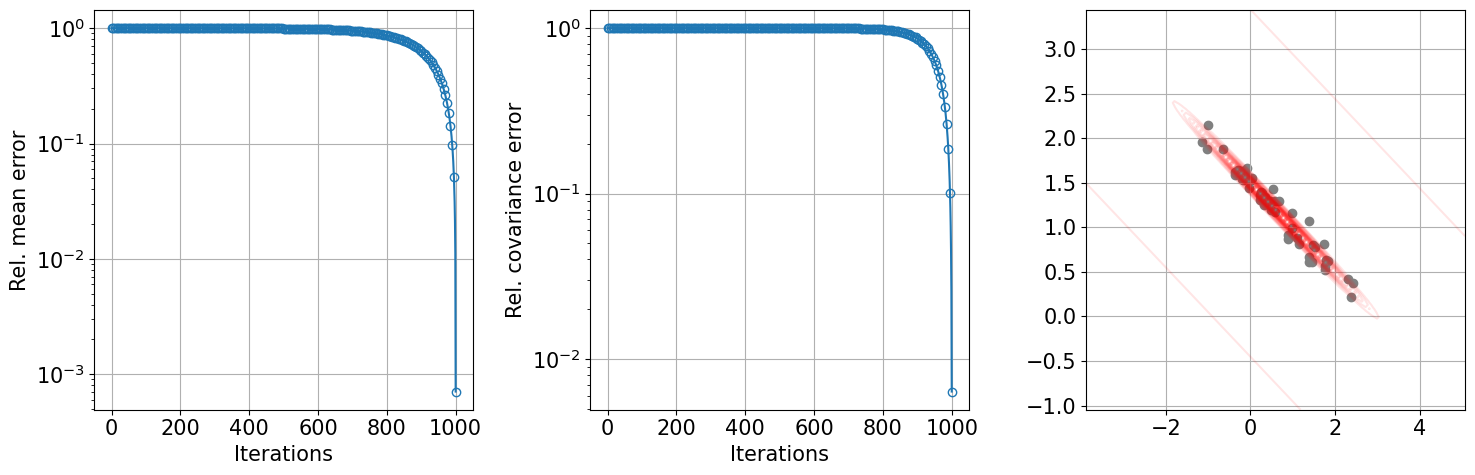

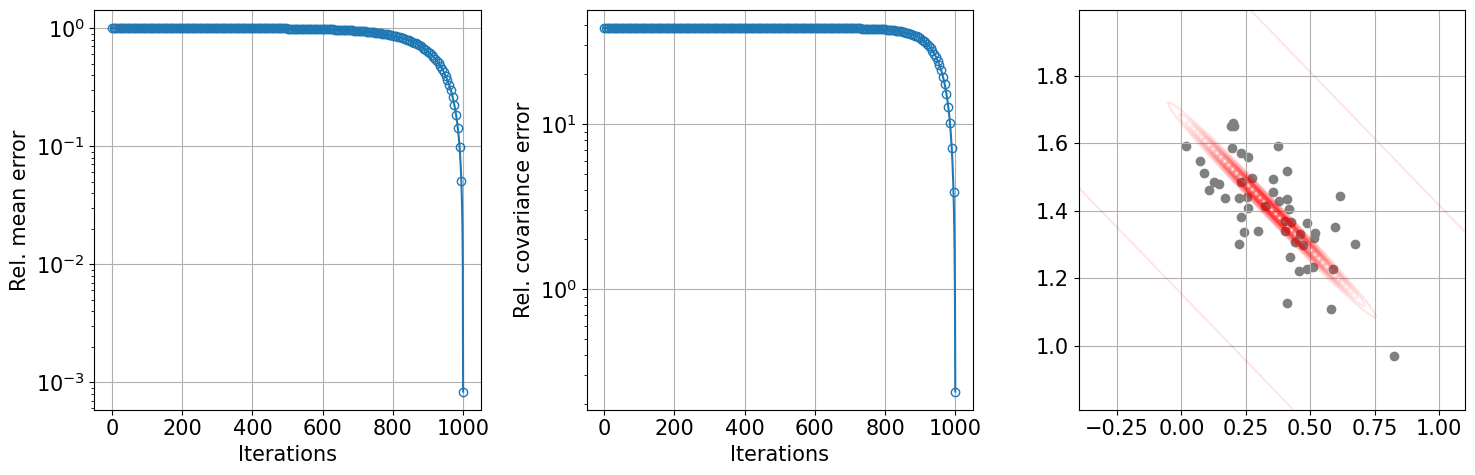

In [4]:
FT = Float64

Random.seed!(123)
N_iter = 1000
T = 10.0
N_θ = 2
prior_mean  = zeros(FT, N_θ)
prior_cov   = Array(Diagonal(fill(1.0^2, N_θ)))

for problem_type in ("under-determined", "over-determined")
    
    θ_post, Σ_post, G, y, Σ_η = Two_Param_Linear_Test(problem_type, prior_mean, prior_cov)
    
    N_y = length(y)
    
    s_param = Setup_Param(G, N_θ, N_y)
     
    filter_type = "cubature_transform"
    N_p = 50
    θ0 = Array(rand(MvNormal(prior_mean, prior_cov), N_p)')
    
    
    diffki_obj = DiffusionKI_Run(s_param, forward, θ0, prior_mean, prior_cov, y, 
                Σ_η, T, N_iter; filter_type = "cubature_transform", randomized_update = false)
    
        
    diffki_errors    = zeros(FT, N_iter+1, 2)
    
    
    for i = 1:N_iter+1
        
        diffki_errors[i, 1] = norm(dropdims(mean(diffki_obj.θ[i], dims=1), dims=1) .- θ_post)/norm(θ_post)
        diffki_errors[i, 2] = norm(construct_cov(diffki_obj.θ[i]) .- Σ_post)/norm(Σ_post)
        
    end
    
    ites = Array(0:N_iter)
    

    markevery = 5
    
    fig, ax = PyPlot.subplots(nrows = 1, ncols=3, sharex=false, sharey=false, figsize=(15,5))
    ax[1].semilogy(ites, diffki_errors[:, 1],   "-o", color = "C0", fillstyle="none", label="Diff-KI)", markevery = markevery)
    ax[1].set_xlabel("Iterations")
    ax[1].set_ylabel("Rel. mean error")
    ax[1].grid("on")
    

    ax[2].semilogy(ites, diffki_errors[:, 2],   "-o", color = "C0", fillstyle="none", label="Diff-KI", markevery = markevery)
    ax[2].set_xlabel("Iterations")
    ax[2].set_ylabel("Rel. covariance error")
    ax[2].grid("on")
    # ax[2].legend(bbox_to_anchor=(1.0, 1.0))
        
    
    Nx = Ny = 100 
    X,Y,Z = Gaussian_2d(θ_post, Σ_post, Nx, Ny)
    ax[3].contour(X, Y, Z, 50, colors = "red", alpha=0.1)
    ax[3].scatter(diffki_obj.θ[end][:, 1], diffki_obj.θ[end][:, 2], color = "grey")
    ax[3].grid("on") 
    
    
    fig.tight_layout()
    fig.savefig("Linear-$(problem_type).pdf")
end




In [6]:
diffki_obj.θ

LoadError: UndefVarError: `diffki_obj` not defined